# Plot fig. 7.11

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
import matplotlib.patches as mp
from netCDF4 import Dataset
import warnings

from ar6.utils.h5 import *

In [2]:
# TODO - sort out figure sizing

pl.rcParams['figure.figsize'] = (18/2.54, 11/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.major.left'] = True
pl.rcParams['ytick.major.size'] = 0
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 150

In [3]:
results = load_dict_from_hdf5('../data_input_large/ERF_leave_one_out.h5')

/nfs/b0110/Users/mencsm/ar6/src/ar6/utils/h5.py:43: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


In [4]:
AR6_forc = {}
AR6_ecsforc = {}
forcings = ['co2', 'ch4', 'n2o', 'other_wmghg', 'o3_trop', 'o3_strat', 'h2o_strat',
            'contrails', 'aerosol-radiation_interactions', 'aerosol-cloud_interactions', 
            'bc_on_snow', 'land_use', 'volcanic', 'solar']
for forcing in forcings:
    AR6_forc[forcing] = np.zeros(5)
    AR6_forc[forcing] = np.percentile(results['AR6-historical']['surface_temperature'][-1] - results['remove_%s' % forcing]['surface_temperature'][-1], (5,16,50,84,95))
    AR6_ecsforc[forcing] = np.zeros(5)
    AR6_ecsforc[forcing] = np.percentile(results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_%s_climuncert' % forcing]['surface_temperature'][-1], (5,16,50,84,95))    

# create some new aggregated categories
non_co2_ghgs = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_ch4']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_n2o']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_other_wmghg']['surface_temperature'][-1]
)
AR6_forc['ch4+n2o+cfc'] = np.percentile(non_co2_ghgs, (5,16,50,84,95))
non_co2_ghgs = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_ch4_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_n2o_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_other_wmghg_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['ch4+n2o+cfc'] = np.percentile(non_co2_ghgs, (5,16,50,84,95))

all_ghgs = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_co2']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_ch4']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_n2o']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_other_wmghg']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3_trop']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3_strat']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_h2o_strat']['surface_temperature'][-1]
)
AR6_forc['all_ghgs'] = np.percentile(all_ghgs, (5,16,50,84,95))
all_ghgs = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_co2_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_ch4_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_n2o_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_other_wmghg_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_trop_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_strat_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_h2o_strat_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['all_ghgs'] = np.percentile(all_ghgs, (5,16,50,84,95))

ozone = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3_strat']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3_trop']['surface_temperature'][-1]
)
AR6_forc['o3'] = np.percentile(ozone, (5,16,50,84,95))
ozone = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_strat_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_trop_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['o3'] = np.percentile(ozone, (5,16,50,84,95))

aerosol = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions']['surface_temperature'][-1]
)
AR6_forc['aerosol'] = np.percentile(aerosol, (5,16,50,84,95))
aerosol = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['aerosol'] = np.percentile(aerosol, (5,16,50,84,95))

anthro = (
    results['AR6-historical']['surface_temperature'][-1] - results['remove_co2']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_ch4']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_n2o']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_other_wmghg']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3_trop']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_o3_strat']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_h2o_strat']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_contrails']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_bc_on_snow']['surface_temperature'][-1] +
    results['AR6-historical']['surface_temperature'][-1] - results['remove_land_use']['surface_temperature'][-1]
)
AR6_forc['anthro'] = np.percentile(anthro, (5,16,50,84,95))
anthro = (
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_co2_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_ch4_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_n2o_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_other_wmghg_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_trop_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_o3_strat_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_h2o_strat_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_contrails_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-radiation_interactions_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_aerosol-cloud_interactions_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_bc_on_snow_climuncert']['surface_temperature'][-1] +
    results['AR6-historical_climuncert']['surface_temperature'][-1] - results['remove_land_use_climuncert']['surface_temperature'][-1]
)
AR6_ecsforc['anthro'] = np.percentile(anthro, (5,16,50,84,95))

AR6_forc['total'] = np.percentile(results['AR6-historical']['surface_temperature'][-1], (5,16,50,84,95))
AR6_ecsforc['total'] = np.percentile(results['AR6-historical_climuncert']['surface_temperature'][-1], (5,16,50,84,95))

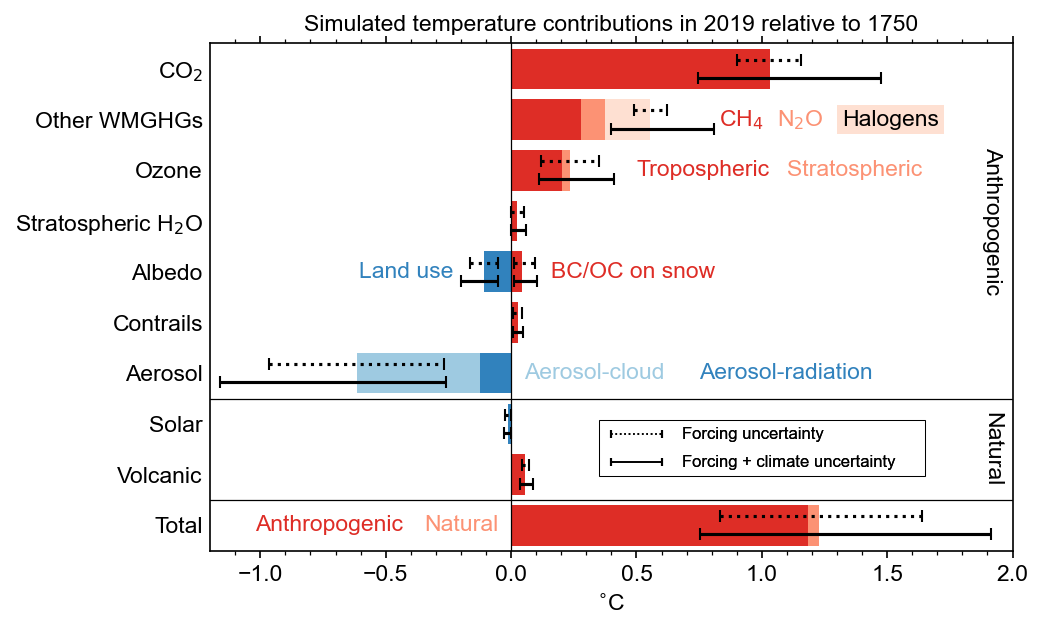

In [5]:
fig, ax = pl.subplots()

# errorbar for owmghg is going to be a mess so pre-calculate it

#hot = ['#f03b20','#feb24c','#feeda0']
hot = ['#de2d26','#fc9274','#fee0d2']
cool=['#3182bd','#9ecae1']

ax.barh(0, AR6_forc['co2'][2], color=hot[0])
eb = ax.errorbar(AR6_forc['co2'][2], 0.18, xerr=np.array([AR6_forc['co2'][2]-AR6_forc['co2'][0],AR6_forc['co2'][4]-AR6_forc['co2'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['co2'][2], -0.18, xerr=np.array([AR6_ecsforc['co2'][2]-AR6_ecsforc['co2'][0],AR6_ecsforc['co2'][4]-AR6_ecsforc['co2'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-1, AR6_forc['ch4'][2], color=hot[0])
ax.barh(-1, AR6_forc['n2o'][2], color=hot[1], left=AR6_forc['ch4'][2])
ax.barh(-1, AR6_forc['other_wmghg'][2], color=hot[2], left=AR6_forc['ch4'][2]+AR6_forc['n2o'][2])
eb = ax.errorbar(AR6_forc['ch4+n2o+cfc'][2], -0.82, xerr=np.array([AR6_forc['ch4+n2o+cfc'][2]-AR6_forc['ch4+n2o+cfc'][0],AR6_forc['ch4+n2o+cfc'][4]-AR6_forc['ch4+n2o+cfc'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['ch4+n2o+cfc'][2], -1.18, xerr=np.array([AR6_ecsforc['ch4+n2o+cfc'][2]-AR6_ecsforc['ch4+n2o+cfc'][0],AR6_ecsforc['ch4+n2o+cfc'][4]-AR6_ecsforc['ch4+n2o+cfc'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-2, AR6_forc['o3_trop'][2], color=hot[0])
ax.barh(-2, AR6_forc['o3_strat'][2], color=hot[1], left=AR6_forc['o3_trop'][2])
eb = ax.errorbar(AR6_forc['o3'][2], -1.82, xerr=np.array([AR6_forc['o3'][2]-AR6_forc['o3'][0],AR6_forc['o3'][4]-AR6_forc['o3'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['o3'][2], -2.18, xerr=np.array([AR6_ecsforc['o3'][2]-AR6_ecsforc['o3'][0],AR6_ecsforc['o3'][4]-AR6_ecsforc['o3'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-3, AR6_forc['h2o_strat'][2], color=hot[0])
eb = ax.errorbar(AR6_forc['h2o_strat'][2], -2.82, xerr=np.array([AR6_forc['h2o_strat'][2]-AR6_forc['h2o_strat'][0],AR6_forc['h2o_strat'][4]-AR6_forc['h2o_strat'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['h2o_strat'][2], -3.18, xerr=np.array([AR6_ecsforc['h2o_strat'][2]-AR6_ecsforc['h2o_strat'][0],AR6_ecsforc['h2o_strat'][4]-AR6_ecsforc['h2o_strat'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-4, AR6_forc['land_use'][2], color=cool[0])
eb = ax.errorbar(AR6_forc['land_use'][2], -3.82, xerr=np.array([AR6_forc['land_use'][2]-AR6_forc['land_use'][0],AR6_forc['land_use'][4]-AR6_forc['land_use'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['land_use'][2], -4.18, xerr=np.array([AR6_ecsforc['land_use'][2]-AR6_ecsforc['land_use'][0],AR6_ecsforc['land_use'][4]-AR6_ecsforc['land_use'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-4, AR6_forc['bc_on_snow'][2], color=hot[0])
eb = ax.errorbar(AR6_forc['bc_on_snow'][2], -3.82, xerr=np.array([AR6_forc['bc_on_snow'][2]-AR6_forc['bc_on_snow'][0],AR6_forc['bc_on_snow'][4]-AR6_forc['bc_on_snow'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['bc_on_snow'][2], -4.18, xerr=np.array([AR6_ecsforc['bc_on_snow'][2]-AR6_ecsforc['bc_on_snow'][0],AR6_ecsforc['bc_on_snow'][4]-AR6_ecsforc['bc_on_snow'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-5, AR6_forc['contrails'][2], color=hot[0])
eb = ax.errorbar(AR6_forc['contrails'][2], -4.82, xerr=np.array([AR6_forc['contrails'][2]-AR6_forc['contrails'][0],AR6_forc['contrails'][4]-AR6_forc['contrails'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['contrails'][2], -5.18, xerr=np.array([AR6_ecsforc['contrails'][2]-AR6_ecsforc['contrails'][0],AR6_ecsforc['contrails'][4]-AR6_ecsforc['contrails'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-6, AR6_forc['aerosol-radiation_interactions'][2], color=cool[0])
ax.barh(-6, AR6_forc['aerosol-cloud_interactions'][2], color=cool[1], left=AR6_forc['aerosol-radiation_interactions'][2])
eb = ax.errorbar(AR6_forc['aerosol'][2], -5.82, xerr=np.array([AR6_forc['aerosol'][2]-AR6_forc['aerosol'][0],AR6_forc['aerosol'][4]-AR6_forc['aerosol'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['aerosol'][2], -6.18, xerr=np.array([AR6_ecsforc['aerosol'][2]-AR6_ecsforc['aerosol'][0],AR6_ecsforc['aerosol'][4]-AR6_ecsforc['aerosol'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-7, AR6_forc['solar'][2], color=cool[0])
eb = ax.errorbar(AR6_forc['solar'][2], -6.82, xerr=np.array([AR6_forc['solar'][2]-AR6_forc['solar'][0],AR6_forc['solar'][4]-AR6_forc['solar'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['solar'][2], -7.18, xerr=np.array([AR6_ecsforc['solar'][2]-AR6_ecsforc['solar'][0],AR6_ecsforc['solar'][4]-AR6_ecsforc['solar'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-8, AR6_forc['volcanic'][2], color=hot[0])
eb = ax.errorbar(AR6_forc['volcanic'][2], -7.82, xerr=np.array([AR6_forc['volcanic'][2]-AR6_forc['volcanic'][0],AR6_forc['volcanic'][4]-AR6_forc['volcanic'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['volcanic'][2], -8.18, xerr=np.array([AR6_ecsforc['volcanic'][2]-AR6_ecsforc['volcanic'][0],AR6_ecsforc['volcanic'][4]-AR6_ecsforc['volcanic'][2]]).reshape((2,1)), capsize=3, color='k')

ax.barh(-9, AR6_forc['anthro'][2], color=hot[0])
ax.barh(-9, AR6_forc['solar'][2]+AR6_forc['volcanic'][2], color=hot[1], left=AR6_forc['anthro'][2])
eb = ax.errorbar(AR6_forc['total'][2], -8.82, xerr=np.array([AR6_forc['total'][2]-AR6_forc['total'][0],AR6_forc['total'][4]-AR6_forc['total'][2]]).reshape((2,1)), capsize=3, color='k')
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(AR6_ecsforc['total'][2], -9.18, xerr=np.array([AR6_ecsforc['total'][2]-AR6_ecsforc['total'][0],AR6_ecsforc['total'][4]-AR6_ecsforc['total'][2]]).reshape((2,1)), capsize=3, color='k')

# labels and prettiness
ax.text(0.92, -1, 'CH$_4$',ha='center',va='center', color=hot[0])
ax.text(1.155, -1,'N$_2$O',ha='center',va='center', color=hot[1])
ax.text(1.32, -1, 'Halogens', va='center', color='k', bbox=dict(facecolor=hot[2], boxstyle='square,pad=0.2', lw=0))
ax.text(1.1, -2, 'Stratospheric', va='center', ha='left', color=hot[1])
ax.text(0.5, -2, 'Tropospheric', va='center', ha='left', color=hot[0])
ax.text(-0.23,-4, 'Land use', va='center', ha='right', color=cool[0])
ax.text(0.16, -4, 'BC/OC on snow', va='center', ha='left', color=hot[0])
ax.text(0.05, -6, 'Aerosol-cloud', va='center', ha='left', color=cool[1])
ax.text(0.75, -6, 'Aerosol-radiation', va='center', ha='left', color=cool[0])
ax.text(-0.43, -9, 'Anthropogenic', va='center', ha='right', color=hot[0])
ax.text(-0.05, -9, 'Natural', va='center', ha='right', color=hot[1])

ax.text(1.92, -3, 'Anthropogenic', va='center', ha='center', rotation=270)
ax.text(1.92, -7.5, 'Natural', va='center', ha='center', rotation=270)

ax.set_ylim(-9.5,0.5)
ax.set_xlim(-1.2,2.0)
ax.axvline(0, color='k', lw=0.6)
ax.axhline(-6.5, color='k', lw=0.6)
ax.axhline(-8.5, color='k', lw=0.6)
ax.set_yticks(np.arange(-9,1));
ax.set_xlabel('$^{\circ}$C')
ax.set_title('')
ax.set_yticklabels(['CO$_2$','Other WMGHGs','Ozone','Stratospheric H$_2$O', 'Albedo', 'Contrails', 'Aerosol', 'Solar', 'Volcanic', 'Total'][::-1]);
ax.set_title('Simulated temperature contributions in 2019 relative to 1750', size=11)

# legend
eb = ax.errorbar(0.5, -7.2, xerr=0.1, color='k', capsize=2, lw=0.8)
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(0.5, -7.75, xerr=0.1, color='k', capsize=2, lw=0.8)
ax.text(0.68, -7.215, 'Forcing uncertainty', va='center', fontsize=8);
ax.text(0.68, -7.765, 'Forcing + climate uncertainty', va='center', fontsize=8);

# legend
eb = ax.errorbar(0.5, -7.2, xerr=0.1, color='k', capsize=2, lw=0.8)
eb[-1][0].set_linestyle(':')
eb = ax.errorbar(0.5, -7.75, xerr=0.1, color='k', capsize=2, lw=0.8)
ax.text(0.68, -7.215, 'Forcing uncertainty', va='center', fontsize=8);
ax.text(0.68, -7.765, 'Forcing + climate uncertainty', va='center', fontsize=8);

rect = mp.Rectangle((0.35, -8.02), 1.3, 1.1, facecolor='None', edgecolor='k', lw=0.5)
ax.add_patch(rect)

# Create the figure
fig.subplots_adjust(left=0.2)
pl.tight_layout()
pl.savefig('../figures/fig7.11.png')
pl.savefig('../figures/fig7.11.pdf')

In [6]:
AR6_ecsforc['all_ghgs'][2]

1.8825226091599596

In [7]:
AR6_ecsforc['all_ghgs'][0]

1.3384746872478646

In [8]:
AR6_ecsforc['all_ghgs'][4]

2.6574451810826067

In [9]:
AR6_ecsforc['aerosol'][2], AR6_ecsforc['aerosol'][0], AR6_ecsforc['aerosol'][4]

(-0.6312485347336745, -1.1623264339965325, -0.2602548175428638)

In [10]:
AR6_ecsforc['volcanic'][2], AR6_ecsforc['volcanic'][0], AR6_ecsforc['volcanic'][4]

(0.05754465918676277, 0.0367376986157279, 0.08595822487948002)

In [17]:
df = pd.DataFrame(AR6_forc)
df['percentile'] = [5,16,50,84,95]
df.to_csv('../data_output/fig7.11_ERFonly_figdata.csv', index=False)

In [18]:
df = pd.DataFrame(AR6_ecsforc)
df['percentile'] = [5,16,50,84,95]
df.to_csv('../data_output/fig7.11_ERF+response_figdata.csv', index=False)